In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from keras.regularizers import l1
from numpy.random import seed


In [80]:
plt.style.use('default')
matplotlib.rcParams['figure.figsize'] = (6, 4)
matplotlib.rc('image', cmap='RdBu')
sns.set_palette('Reds')
seed(1)

In [81]:
def plot_confusion_matrix(model, X, y):
    y_pred = (model.predict(X)).argmax(axis=-1)
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', alpha=0.8, vmin=0)

In [82]:
def plot_accuracy(fit):
    plt.plot(fit.history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

In [83]:
data = pd.read_excel('./data/Q2/Dry_Bean_Dataset.xlsx')


In [84]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [85]:

y = data[['Class']]
X = data.drop('Class', inplace=False, axis=1)

In [86]:
scaler = preprocessing.StandardScaler().fit(X)

X_norm = scaler.transform(X)

le = preprocessing.LabelEncoder()

y = le.fit_transform(y['Class'])



In [87]:
model = keras.Sequential()
model.add(keras.layers.Dense(600, input_shape=(16,), activation='relu'))
model.add(keras.layers.Dense(400, activation='relu', activity_regularizer=l1(0.001)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(300, activation='relu', activity_regularizer=l1(0.001)))
model.add(keras.layers.Dense(100, activation='relu'))

model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(20, activation='relu'))

model.add(keras.layers.Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
## history = model.fit(X, y, verbose=1, epochs=100)
history_norm = model.fit(X_norm, y, verbose=1, epochs=100, batch_size=200)

Epoch 1/100
69/69 [==============================] - 4s 33ms/step - loss: 0.9582 - accuracy: 0.6986
Epoch 2/100
69/69 [==============================] - 2s 33ms/step - loss: 0.3362 - accuracy: 0.9155
Epoch 3/100
69/69 [==============================] - 2s 33ms/step - loss: 0.2867 - accuracy: 0.9165
Epoch 4/100
69/69 [==============================] - 2s 34ms/step - loss: 0.2639 - accuracy: 0.9228
Epoch 5/100
69/69 [==============================] - 2s 34ms/step - loss: 0.2557 - accuracy: 0.9218
Epoch 6/100
69/69 [==============================] - 2s 33ms/step - loss: 0.2547 - accuracy: 0.9223
Epoch 7/100
69/69 [==============================] - 2s 33ms/step - loss: 0.2325 - accuracy: 0.9285
Epoch 8/100
69/69 [==============================] - 2s 32ms/step - loss: 0.2363 - accuracy: 0.9239
Epoch 9/100
69/69 [==============================] - 2s 34ms/step - loss: 0.2316 - accuracy: 0.9237
Epoch 10/100
69/69 [==============================] - 2s 33ms/step - loss: 0.2169 - accuracy: 0.9279

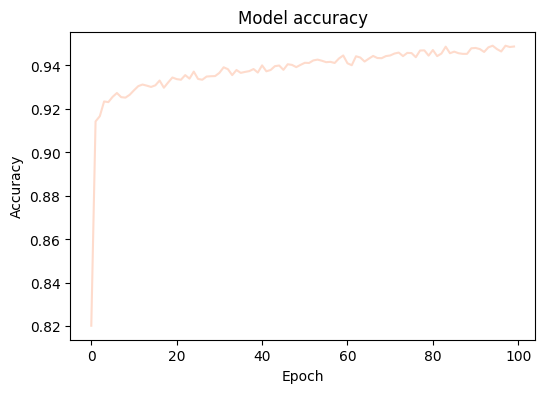

In [88]:
plot_accuracy(history_norm)

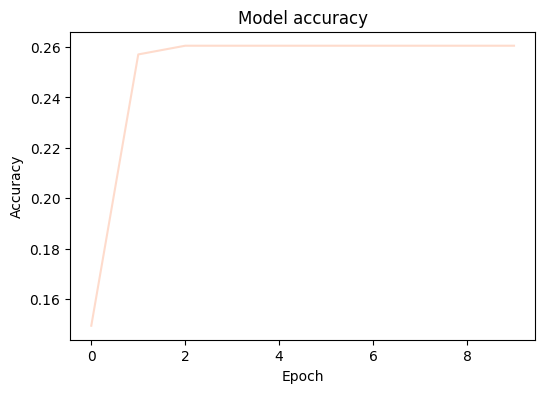

In [89]:
plot_accuracy(history)

In [90]:
def cvNN(X, y):

    cv = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
    cvscores = []
    for train, test in cv.split(X_norm, y):
        model = keras.Sequential()
        model.add(keras.layers.Dense(600, input_shape=(16,), activation='relu'))
        model.add(keras.layers.Dropout(0.1))
        model.add(keras.layers.Dense(400, activation='relu', activity_regularizer=l1(0.001)))
        model.add(keras.layers.Dropout(0.1))
        model.add(keras.layers.Dense(300, activation='relu', activity_regularizer=l1(0.001)))
        model.add(keras.layers.Dense(100, activation='relu'))
        model.add(keras.layers.Dropout(0.1))
        model.add(keras.layers.Dense(50, activation='relu'))

        model.add(keras.layers.Dense(7, activation='softmax'))

        model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
        fit = model.fit(X_norm[train], y[train], epochs=15, verbose=1)        
        scores = model.evaluate(X_norm[test], y[test])
        print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
        cvscores.append(scores[1] * 100)

        pred = model.predict(X_norm[test]).argmax(axis=-1)

    print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

cvNN(X_norm, y)

Epoch 1/15
213/213 [==============================] - 5s 15ms/step - loss: 0.6803 - accuracy: 0.7944
Epoch 2/15
213/213 [==============================] - 4s 17ms/step - loss: 0.3088 - accuracy: 0.9122
Epoch 3/15
213/213 [==============================] - 3s 14ms/step - loss: 0.2763 - accuracy: 0.9173
Epoch 4/15
213/213 [==============================] - 3s 14ms/step - loss: 0.2504 - accuracy: 0.9237
Epoch 5/15
213/213 [==============================] - 3s 14ms/step - loss: 0.2506 - accuracy: 0.9219
Epoch 6/15
213/213 [==============================] - 3s 14ms/step - loss: 0.2607 - accuracy: 0.9197
Epoch 7/15
213/213 [==============================] - 3s 15ms/step - loss: 0.2331 - accuracy: 0.9274
Epoch 8/15
213/213 [==============================] - 3s 15ms/step - loss: 0.2503 - accuracy: 0.9173
Epoch 9/15
213/213 [==============================] - 3s 14ms/step - loss: 0.2280 - accuracy: 0.9291
Epoch 10/15
213/213 [==============================] - 3s 14ms/step - loss: 0.2242 - accura

Epoch 1/100
107/107 [==============================] - 1s 3ms/step - loss: 0.8484 - accuracy: 0.7184
Epoch 2/100
107/107 [==============================] - 0s 3ms/step - loss: 0.2473 - accuracy: 0.9134
Epoch 3/100
107/107 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9221
Epoch 4/100
107/107 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9216
Epoch 5/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9276
Epoch 6/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1858 - accuracy: 0.9289
Epoch 7/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1899 - accuracy: 0.9289
Epoch 8/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1847 - accuracy: 0.9359
Epoch 9/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1908 - accuracy: 0.9259
Epoch 10/100
107/107 [==============================] - 0s 3ms/step - loss: 0.1769 - accura

KeyboardInterrupt: 

In [91]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, input_shape=(16,), activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))

model.add(keras.layers.Dense(7, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
fit = model.fit(X_norm, y, epochs=40, verbose=0)

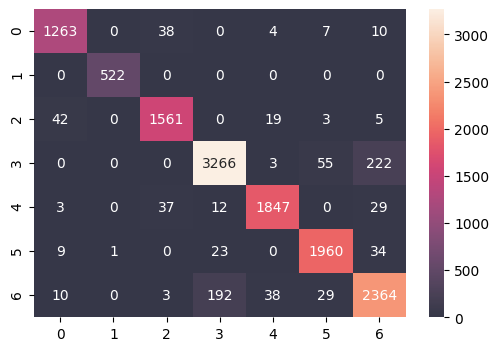

In [92]:

plot_confusion_matrix(model, X_norm, y )


